### Project Requirements

##### Your project aims to develop an AI-powered patient risk stratification tool that:

- Identifies high-risk patients who need immediate bed allocation.
- Manages low to medium-risk patients through medication and monitors their adherence.
- Continuously updates patient risk levels based on daily updates.
- Allocates hospital resources and manages staff based on patient risk levels.
  
##### To effectively develop this tool, you need a dataset that provides:

- Patient demographics and medical history.
- Clinical features relevant to risk assessment (e.g., vital signs, lab results).
- Information on hospital admissions and resource utilization.
- Data on medication adherence or the ability to simulate it.
- Outcome variables to validate risk predictions.


In [1]:
#Loading libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#loading Dataset
df = pd.read_csv("diabetic_data.csv")

In [5]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
df.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [7]:
#checking shape of the dataset
df.shape

(101766, 50)

In [117]:
#Checking data types of each variable
df.dtypes

encounter_id                             int64
patient_nbr                              int64
race                                    object
gender                                  object
age                                     object
admission_type_id                       object
discharge_disposition_id                object
admission_source_id                     object
time_in_hospital                         int64
num_lab_procedures                       int64
num_procedures                           int64
num_medications                          int64
number_diagnoses                         int64
max_glu_serum                           object
A1Cresult                                int64
metformin                                int64
repaglinide                              int64
nateglinide                              int64
chlorpropamide                           int64
glimepiride                              int64
acetohexamide                            int64
glipizide    

In [119]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'diabetic_data.csv'
data = pd.read_csv(file_path)

# Check for missing values or placeholder values like '?'
data.replace('?', np.nan, inplace=True)

# Drop columns with too many missing values (e.g., 'weight' in this dataset)
data.drop(columns=['weight', 'payer_code', 'medical_specialty'], inplace=True)

# Drop rows with missing values in critical columns
data.dropna(inplace=True)

# Display basic information about the cleaned dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 289 entries, 162 to 101088
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              289 non-null    int64 
 1   patient_nbr               289 non-null    int64 
 2   race                      289 non-null    object
 3   gender                    289 non-null    object
 4   age                       289 non-null    object
 5   admission_type_id         289 non-null    int64 
 6   discharge_disposition_id  289 non-null    int64 
 7   admission_source_id       289 non-null    int64 
 8   time_in_hospital          289 non-null    int64 
 9   num_lab_procedures        289 non-null    int64 
 10  num_procedures            289 non-null    int64 
 11  num_medications           289 non-null    int64 
 12  number_outpatient         289 non-null    int64 
 13  number_emergency          289 non-null    int64 
 14  number_inpatient          

In [120]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Encode binary categories using LabelEncoder (e.g., gender)
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])

# Encode 'age' using LabelEncoder
data['age'] = label_encoder.fit_transform(data['age'])

# One-hot encode categorical columns like 'race'
data = pd.get_dummies(data, columns=['race', 'admission_type_id', 'discharge_disposition_id', 
                                     'admission_source_id'], drop_first=True)

# Display the first few rows of the encoded dataset
data.head()


,encounter_id,patient_nbr,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,discharge_disposition_id_2,discharge_disposition_id_3,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_7,discharge_disposition_id_10,discharge_disposition_id_11,discharge_disposition_id_13,admission_source_id_2,admission_source_id_7
162,2521974,80499960,1,7,5,47,1,6,0,0,...,False,True,False,False,False,False,False,False,False,True
460,4084524,76959585,0,6,10,72,1,19,0,0,...,False,False,False,False,False,False,False,False,False,True
593,4804968,114960726,0,4,2,61,0,5,0,0,...,False,False,False,False,False,False,False,False,False,True
696,5319174,87847776,1,6,11,71,1,20,0,0,...,False,False,False,True,False,False,False,False,False,True
771,5993358,60354486,0,2,14,43,0,11,0,0,...,False,False,False,False,False,False,False,False,True,False


In [121]:
# Create a binary target variable for readmission: 1 if readmitted within 30 days, 0 otherwise
data['readmitted'] = data['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

# Select relevant features for modeling
features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
            'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 
            'insulin', 'diabetesMed', 'age', 'gender']

# Encode medication variables (e.g., 'insulin') as numerical values
data['insulin'] = label_encoder.fit_transform(data['insulin'])
data['diabetesMed'] = label_encoder.fit_transform(data['diabetesMed'])

# Define the target variable
target = 'readmitted'

# Split the data into features (X) and target (y)
X = data[features]
y = data[target]


In [122]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (231, 12)
Testing set shape: (58, 12)


In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Instantiate the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")


Accuracy: 0.8276
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
ROC-AUC Score: 0.6604


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [124]:
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Grid search with cross-validation
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), 
                           param_grid, 
                           cv=5, 
                           scoring='roc_auc')

# Fit grid search
grid_search.fit(X_train, y_train)

# Display the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
roc_auc_tuned = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

print(f"Tuned Accuracy: {accuracy_tuned:.4f}")
print(f"Tuned Precision: {precision_tuned:.4f}")
print(f"Tuned Recall: {recall_tuned:.4f}")
print(f"Tuned F1-Score: {f1_tuned:.4f}")
print(f"Tuned ROC-AUC Score: {roc_auc_tuned:.4f}")


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max

Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
Tuned Accuracy: 0.8276
Tuned Precision: 0.0000
Tuned Recall: 0.0000
Tuned F1-Score: 0.0000
Tuned ROC-AUC Score: 0.6604


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


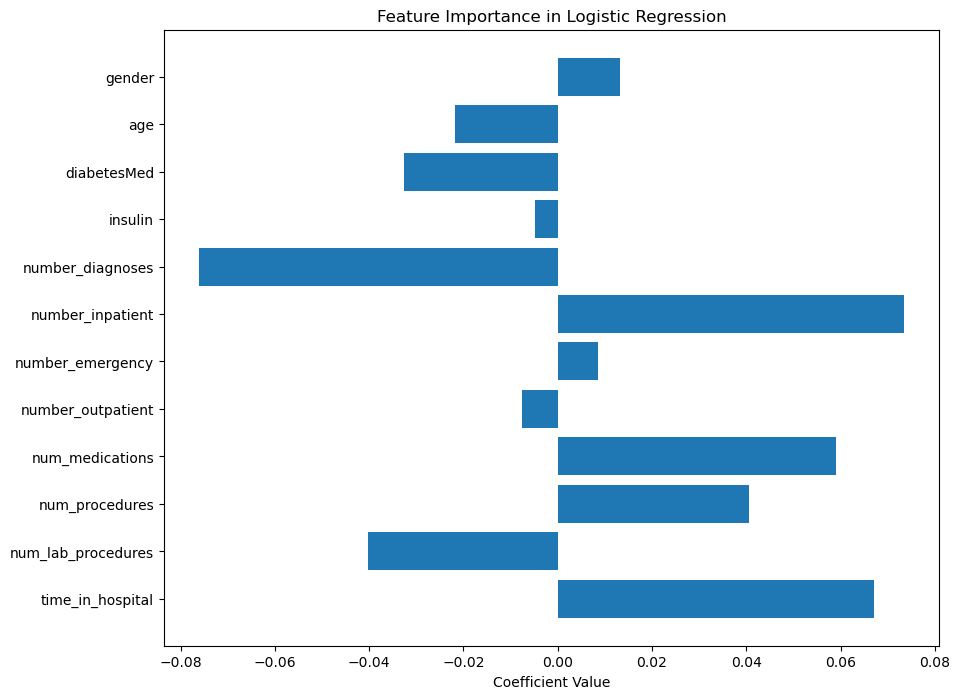

In [125]:
import matplotlib.pyplot as plt

# Get the coefficients and feature names
coefficients = best_model.coef_[0]
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()


In [126]:
import joblib

# Save the trained model
joblib.dump(best_model, 'diabetes_risk_model.pkl')

# To load the model later:
# loaded_model = joblib.load('diabetes_risk_model.pkl')


['diabetes_risk_model.pkl']